In [228]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
from functools import partial
from numpy.lib.polynomial import poly1d

In [229]:
def f(x):
    return np.abs(np.sin(x)) - np.abs(np.cos(x))

In [230]:
def x_cheb_m(m):
    return 0.5 * ((b - a) * np.cos((2*m + 1) / (2*n) * np.pi) + a + b)

In [231]:
def lagrange(x, y):
    M = len(x)
    p = poly1d(0.0)
    for j in range(M):
        pt = poly1d(y[j])
        for k in range(M):
            if k == j:
                continue
            fac = x[j]-x[k]
            pt *= poly1d([1.0, -x[k]])/fac
        p += pt
    return p

In [232]:
def cubic_spline(xi, yi, x0):
    n = len(xi)
    
    dx = np.array([xi[i+1] - xi[i] for i in range(n-1)])
    
    diff_mat = np.array([(yi[i+1] - yi[i]) / dx[i] for i in range(n-1)])

    Trio = np.zeros((n-2, n-2))
    np.fill_diagonal(Trio[1:], dx[1:])
    np.fill_diagonal(Trio, 2*(dx[:-1] + dx[1:]) ) 
    np.fill_diagonal(Trio[:, 1:], dx[:-1])
    
    c = np.zeros(n)
    c[1:-1] = np.linalg.solve(Trio, 6 * (diff_mat[1:] - diff_mat[:-1]))  

    a = yi[:-1]
    b = diff_mat - dx * (2 * c[:-1] + c[1:]) / 6 
    d = (c[1:] - c[:-1]) / dx
    
    ySpl = np.zeros_like(x0)
    for i in range(n-1):
        dx = x0[(xi[i] <= x0) & (x0 < xi[i+1])] - xi[i]
        ySpl[(xi[i] <= x0) & (x0 < xi[i+1])] = a[i] + b[i] * dx + (c[i]/2) * dx**2 + (d[i]/6) * dx**3

    return ySpl, a, b, c, d

In [233]:
a = 0
b = np.pi
n = 6
idx = 43 % n
h = (b - a) / n
x_ = np.linspace(a, b, 100)
y_ = f(x_)
print(f'idx: {idx}')

idx: 1


In [234]:
print(f'x = {np.round(x := np.linspace(a, b, n+1), 3)}')
print(f'x intermediate = {np.round(x_interm := np.linspace(a + 0.75*h, b-h*0.25, n), 3)}')
print(f'x chebyshev = {np.round(x_cheb := np.array([x_cheb_m(m) for m in range(n)])[::-1], 3)}')
print(f'y = {np.round(y := f(x), 3)}')
print(f'y intermediate = {np.round(y_interm := f(x_interm), 3)}')
print(f'y chebyshev = {np.round(y_cheb := f(x_cheb), 3)}')

x = [0.    0.524 1.047 1.571 2.094 2.618 3.142]
x intermediate = [0.393 0.916 1.44  1.963 2.487 3.011]
x chebyshev = [0.054 0.46  1.164 1.977 2.682 3.088]
y = [-1.    -0.366  0.366  1.     0.366 -0.366 -1.   ]
y intermediate = [-0.541  0.185  0.861  0.541 -0.185 -0.861]
y chebyshev = [-0.945 -0.452  0.523  0.523 -0.452 -0.945]


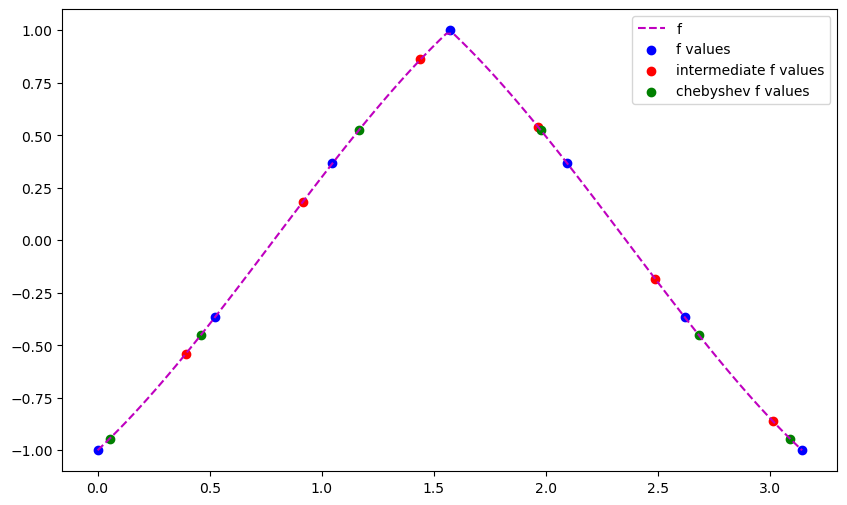

In [235]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.scatter(x, y, color='b', label='f values');
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values');
plt.scatter(x_cheb, y_cheb, color='g', label='chebyshev f values');
plt.legend();

In [236]:
cs = interpolate.CubicSpline(x, y)
y_interm_cs = cs(x_interm)
y_interm_cs - y_interm

array([ 0.017, -0.024,  0.081,  0.045, -0.017,  0.024])

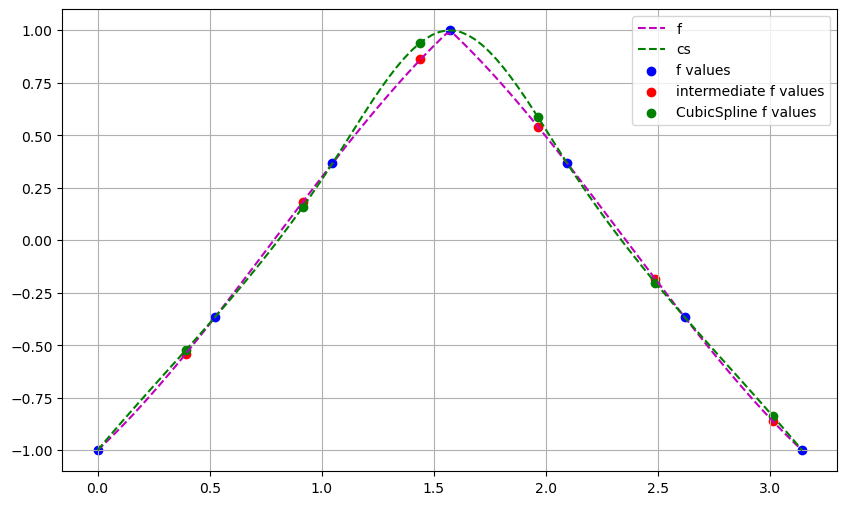

In [237]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, cs(x_), '--', color='g', label='cs')
plt.scatter(x, y, color='b', label='f values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_cs, color='g', label='CubicSpline f values')
plt.grid()
plt.legend();

In [238]:
cs = interpolate.CubicSpline(x_cheb, y_cheb)
y_interm_cs = cs(x_interm)
y_interm_cs - y_interm

array([-0.009,  0.048, -0.168, -0.005,  0.029, -0.013])

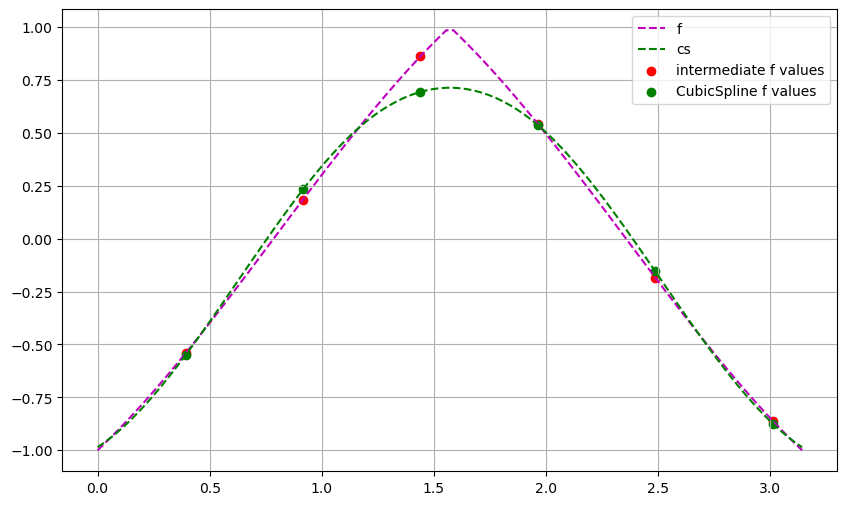

In [239]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, cs(x_), '--', color='g', label='cs')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_cs, color='g', label='CubicSpline f values')
plt.grid()
plt.legend();

In [240]:
lp = interpolate.lagrange(x, y)
y_interm_lp = lp(x_interm)
y_interm_lp - y_interm

array([ 0.136, -0.07 ,  0.092,  0.07 , -0.087,  0.277])

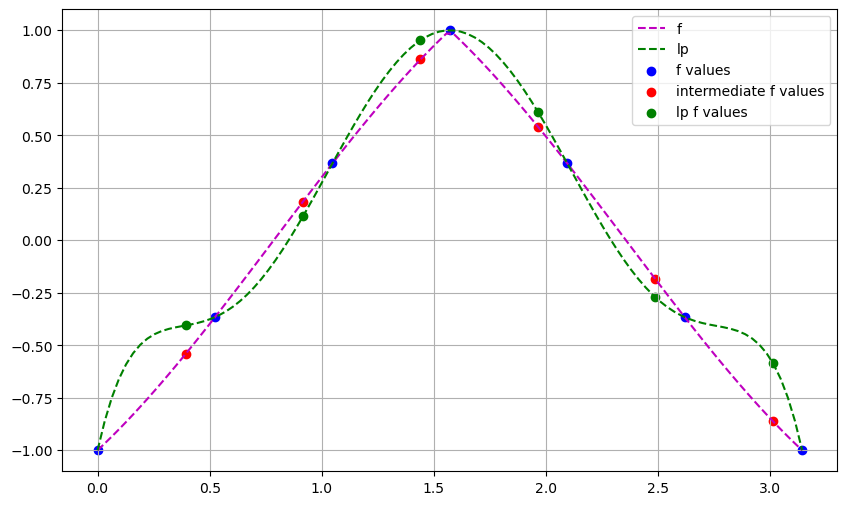

In [241]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, lp(x_), '--', color='g', label='lp')
plt.scatter(x, y, color='b', label='f values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_lp, color='g', label='lp f values')
plt.grid()
plt.legend();

In [242]:
lp = interpolate.lagrange(x_cheb, y_cheb)
y_interm_lp = lp(x_interm)
y_interm_lp - y_interm

array([-0.012,  0.054, -0.165, -0.006,  0.036, -0.019])

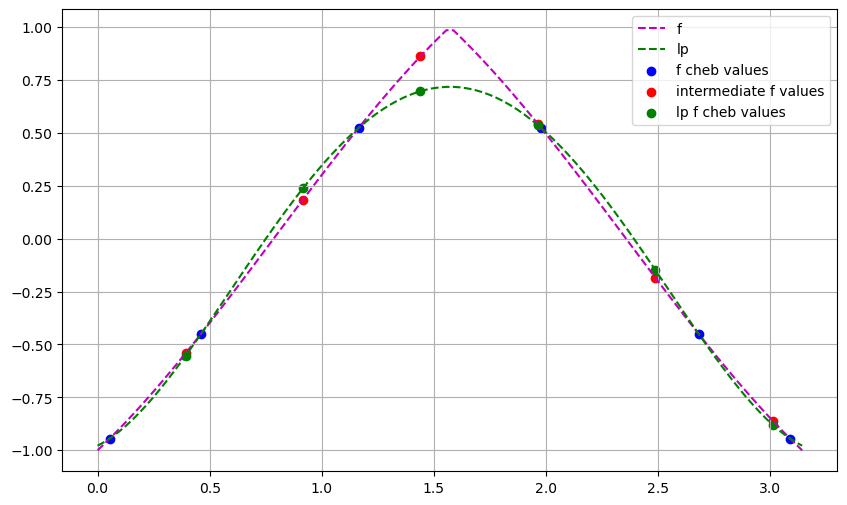

In [243]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, lp(x_), '--', color='g', label='lp')
plt.scatter(x_cheb, y_cheb, color='b', label='f cheb values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_lp, color='g', label='lp f cheb values')
plt.grid()
plt.legend();

In [244]:
print(f'intemediate point {idx} value: {y_interm[idx]}\n\n')

interval1 = slice(1,idx+2)
lp1 = lagrange(x[interval1], y[interval1])
y_interm_lp1 = lp1(x_interm[idx])
print(f'1 degree polinom \n{lp1}')
print(f'value in intemediate point {idx}, y = {y_interm_lp1}')

interval2 = slice(0,idx+2)
lp2 = lagrange(x[interval2], y[interval2])
y_interm_lp2 = lp2(x_interm[idx])
print(f'2 degree polinom\n{lp2}')
print(f'value in intemediate point {idx}, y = {y_interm_lp2}')

interval3 = slice(0,idx+3)
lp3 = lagrange(x[interval3], y[interval3])
y_interm_lp3 = lp1(x_interm[idx])
print(f'3 degree polinom\n{lp3}')
print(f'value in intemediate point {idx}, y = {y_interm_lp3}')

lpf = lagrange(x, y)
y_interm_lpf = lpf(x_interm[idx])
print(f'n-1 degree polinom\n{lpf}')
print(f'value in intemediate point {idx}, y = {y_interm_lpf}')

intemediate point 1 value: 0.1845919112825145


1 degree polinom 
 
1.398 x - 1.098
value in intemediate point 1, y = 0.1830127018922194
2 degree polinom
        2
0.1789 x + 1.117 x - 1
value in intemediate point 1, y = 0.17381805707784603
3 degree polinom
         3          2
-0.2277 x + 0.5366 x + 0.9923 x - 1
value in intemediate point 1, y = 0.1830127018922194
n-1 degree polinom
         6        5         4         3         2
-0.4467 x + 4.21 x - 14.62 x + 22.63 x - 15.33 x + 4.832 x - 1
value in intemediate point 1, y = 0.11481694945838972


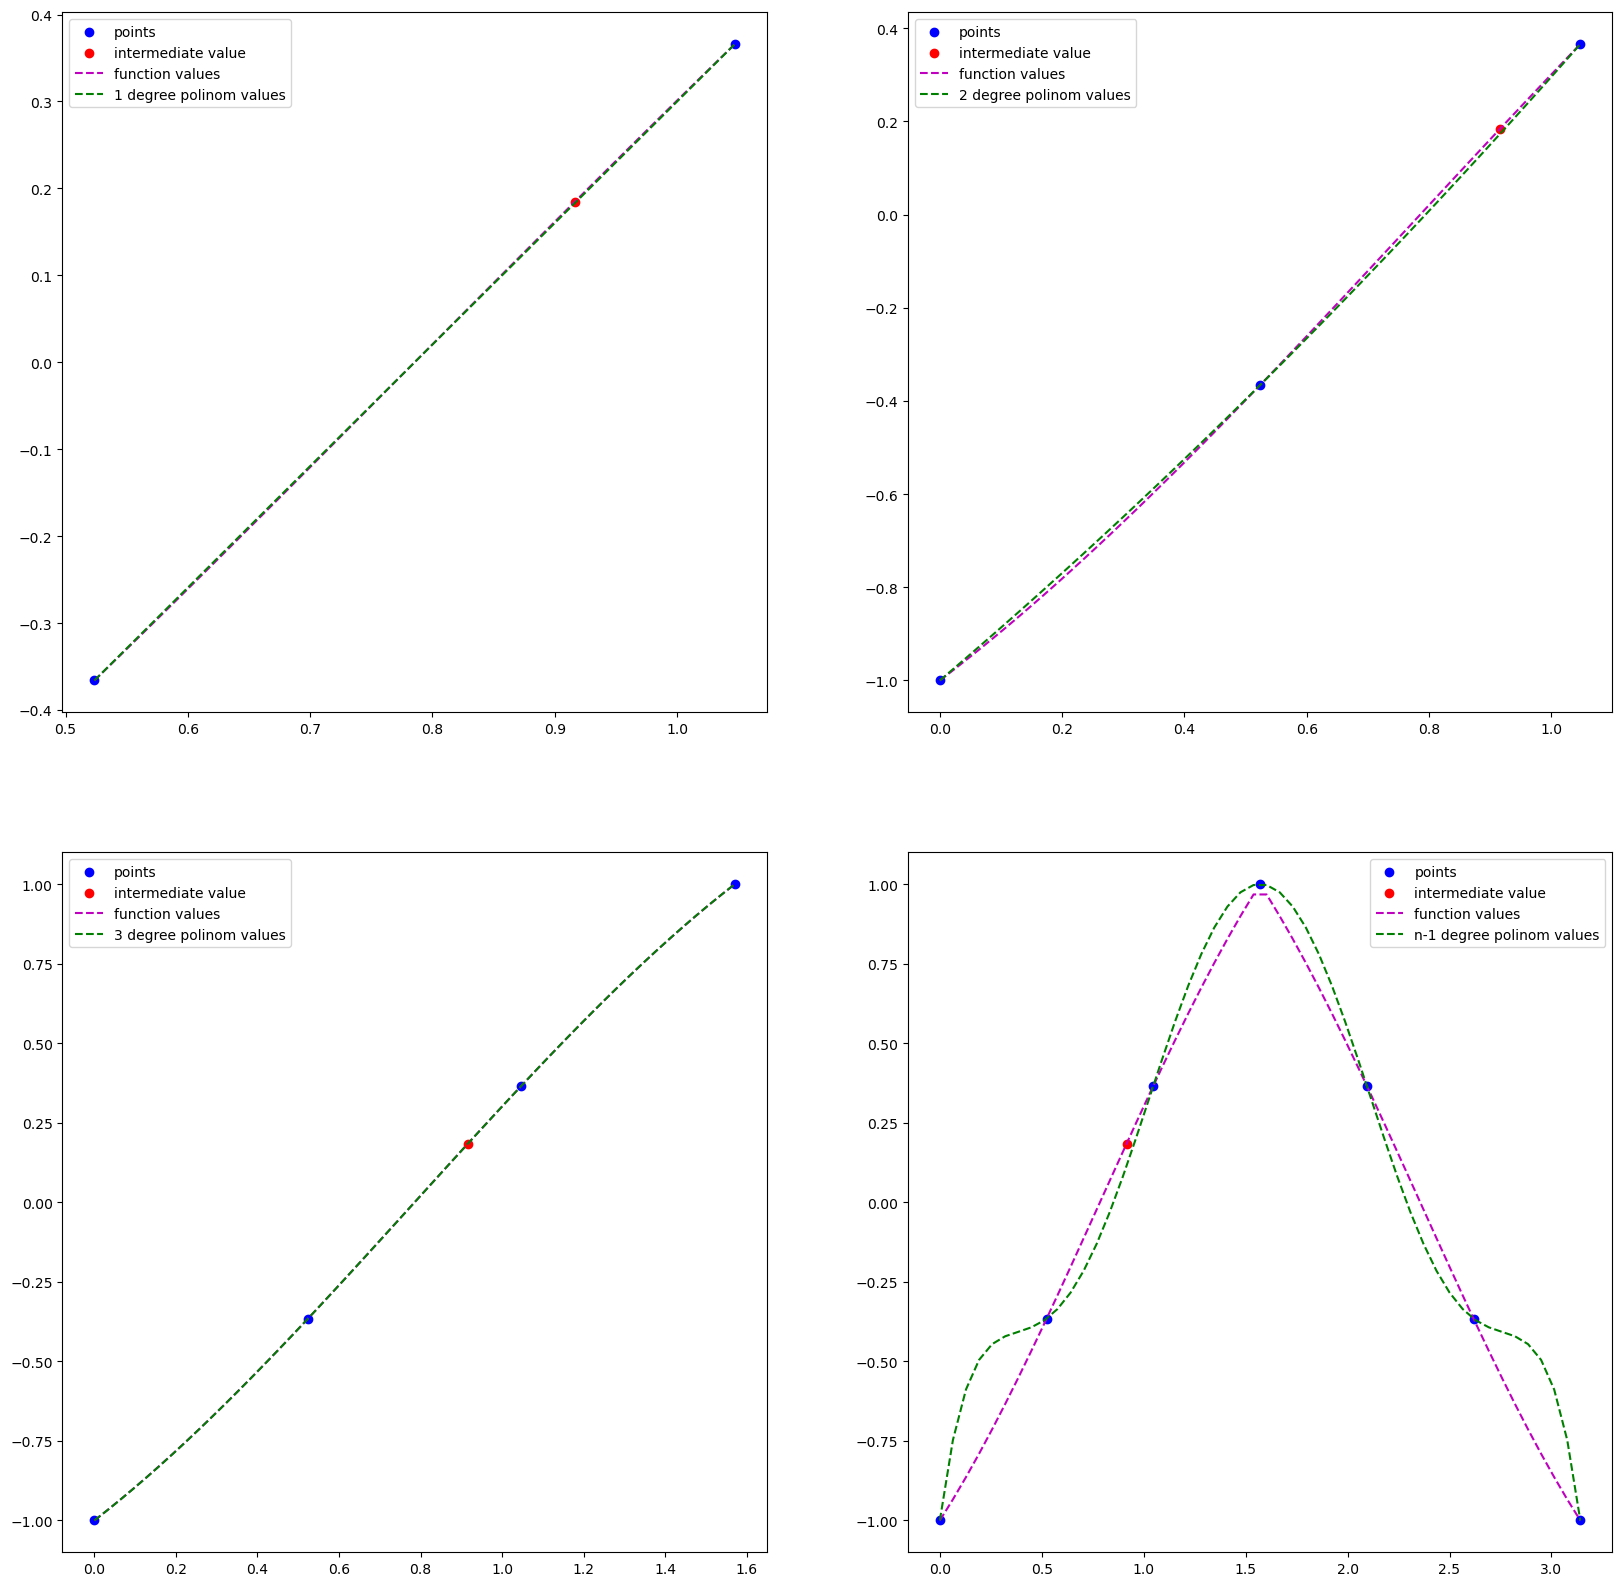

In [245]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axs[0, 0].scatter(x[interval1], y[interval1], color='b', label='points')
axs[0, 0].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[0, 0].plot(x_t:=np.linspace(x[1], x[idx+1]), f(x_t), '--', color='m', label='function values')
axs[0, 0].plot(x_t, lp1(x_t), '--', color='g', label='1 degree polinom values')
axs[0, 0].legend();

axs[0, 1].scatter(x[interval2], y[interval2], color='b', label='points')
axs[0, 1].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[0, 1].plot(x_t:=np.linspace(x[0], x[idx+1]), f(x_t), '--', color='m', label='function values')
axs[0, 1].plot(x_t, lp2(x_t), '--', color='g', label='2 degree polinom values')
axs[0, 1].legend();

axs[1, 0].scatter(x[interval3], y[interval3], color='b', label='points')
axs[1, 0].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[1, 0].plot(x_t:=np.linspace(x[0], x[idx+2]), f(x_t), '--', color='m', label='function values')
axs[1, 0].plot(x_t, lp3(x_t), '--', color='g', label='3 degree polinom values')
axs[1, 0].legend();

axs[1, 1].scatter(x, y, color='b', label='points')
axs[1, 1].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[1, 1].plot(x_t:=np.linspace(x[0], x[-1]), f(x_t), '--', color='m', label='function values')
axs[1, 1].plot(x_t, lpf(x_t), '--', color='g', label='n-1 degree polinom values')
axs[1, 1].legend();

In [246]:
print(f'intemediate point {idx} value: {y_interm[idx]}\n\n')

interval1 = slice(1,idx+2)
lp1 = lagrange(x_cheb[interval1], y_cheb[interval1])
y_interm_lp1 = lp1(x_interm[idx])
print(f'1 degree polinom \n{lp1}')
print(f'value in intemediate point {idx}, y = {y_interm_lp1}')

interval2 = slice(0,idx+2)
lp2 = lagrange(x_cheb[interval2], y_cheb[interval2])
y_interm_lp2 = lp2(x_interm[idx])
print(f'2 degree polinom\n{lp2}')
print(f'value in intemediate point {idx}, y = {y_interm_lp2}')

interval3 = slice(0,idx+3)
lp3 = lagrange(x_cheb[interval3], y_cheb[interval3])
y_interm_lp3 = lp1(x_interm[idx])
print(f'3 degree polinom\n{lp3}')
print(f'value in intemediate point {idx}, y = {y_interm_lp3}')

lpf = lagrange(x_cheb, y_cheb)
y_interm_lpf = lpf(x_interm[idx])
print(f'n-1 degree polinom\n{lpf}')
print(f'value in intemediate point {idx}, y = {y_interm_lpf}')

intemediate point 1 value: 0.1845919112825145


1 degree polinom 
 
1.385 x - 1.089
value in intemediate point 1, y = 0.1797186038234122
2 degree polinom
        2
0.1547 x + 1.133 x - 1.006
value in intemediate point 1, y = 0.16221406717372733
3 degree polinom
         3         2
-0.5548 x + 1.086 x + 0.7879 x - 0.9903
value in intemediate point 1, y = 0.1797186038234122
n-1 degree polinom
           5          4         3         2
2.776e-17 x + 0.2111 x - 1.326 x + 1.917 x + 0.522 x - 0.9783
value in intemediate point 1, y = 0.23822303378489118


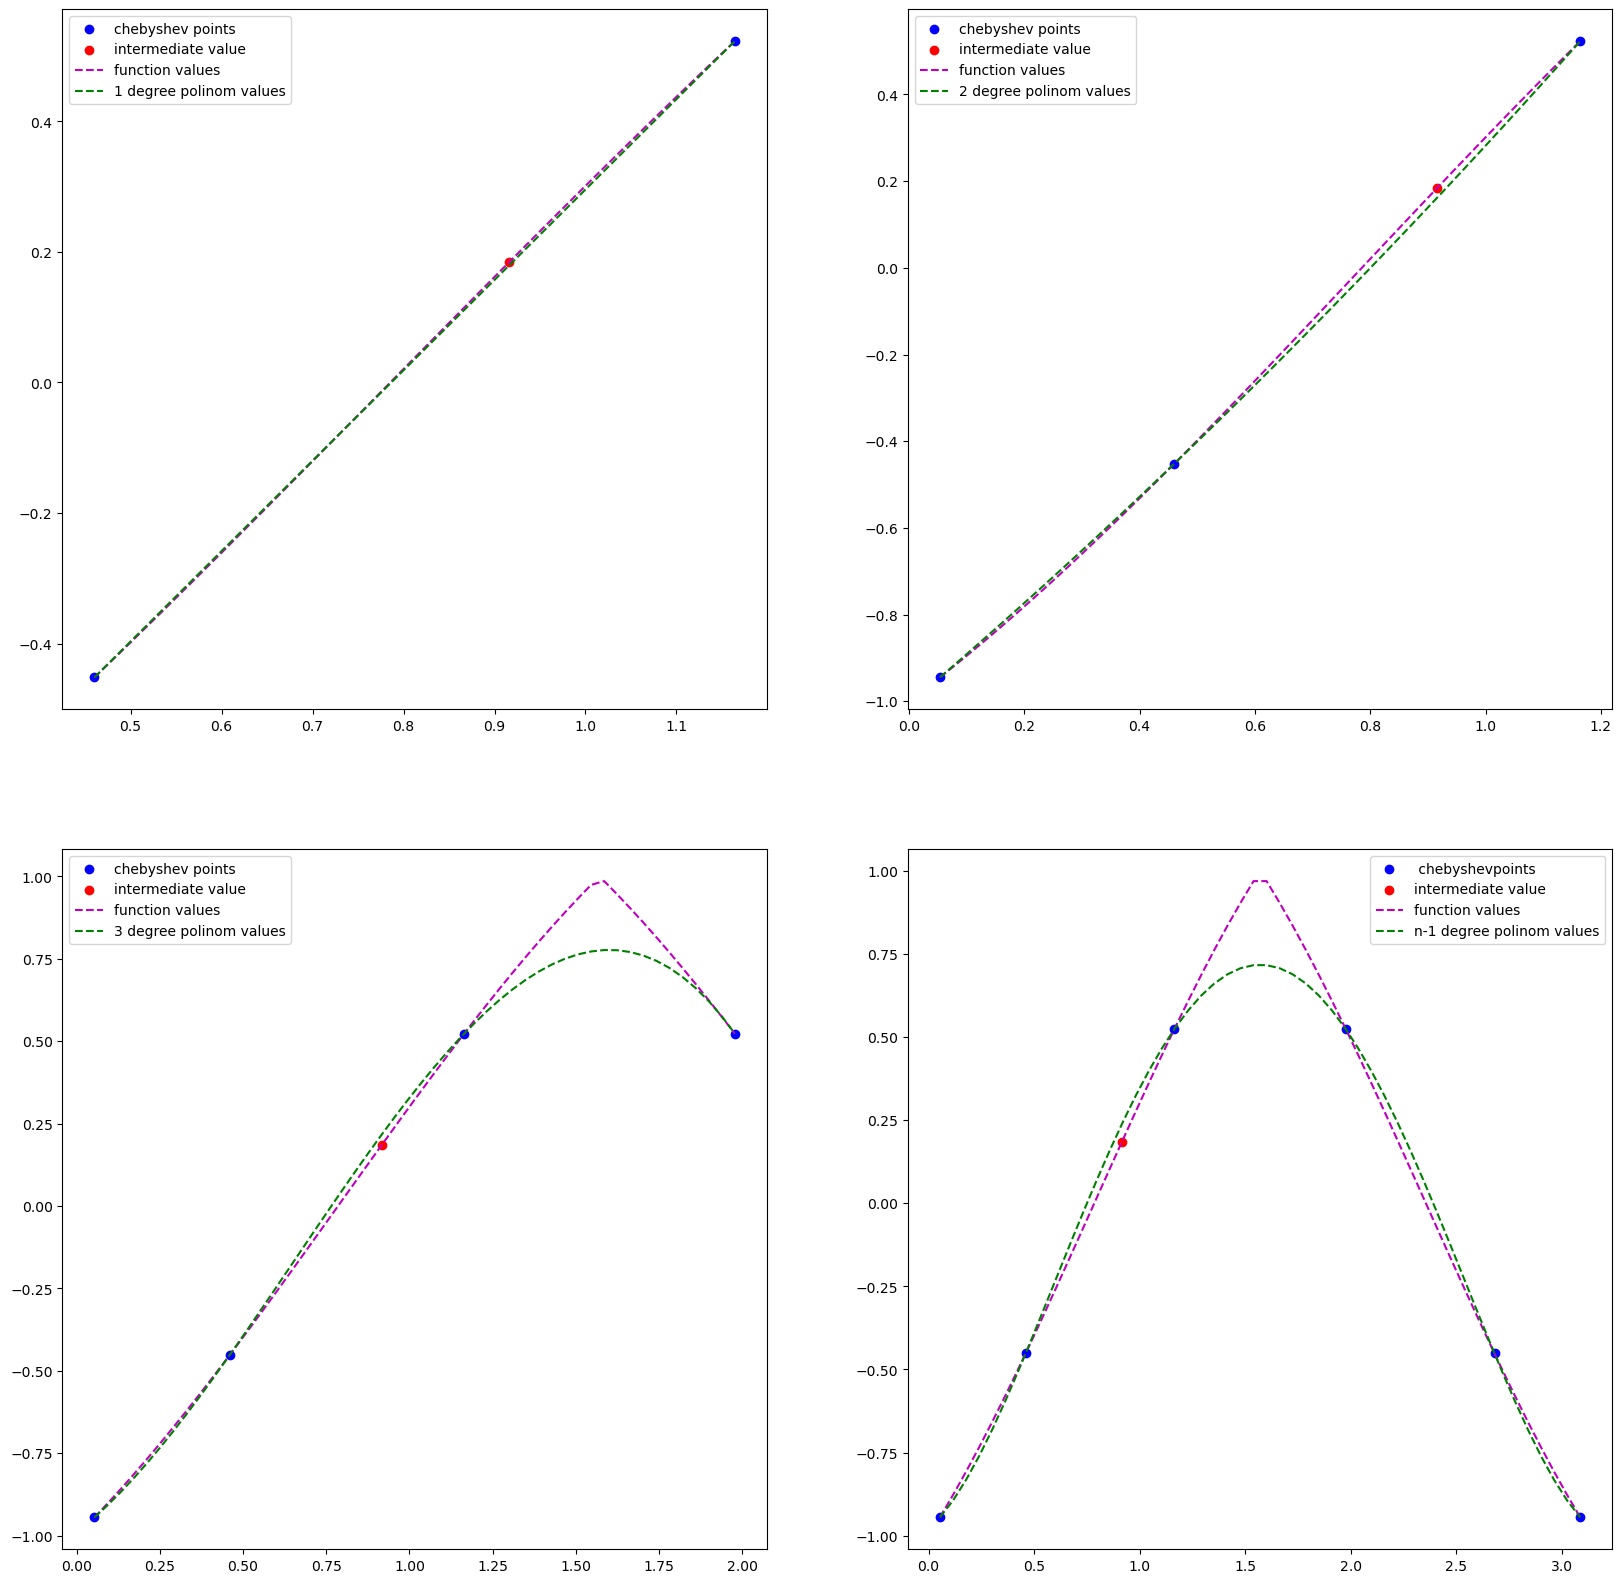

In [247]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axs[0, 0].scatter(x_cheb[interval1], y_cheb[interval1], color='b', label='chebyshev points')
axs[0, 0].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[0, 0].plot(x_t:=np.linspace(x_cheb[1], x_cheb[idx+1]), f(x_t), '--', color='m', label='function values')
axs[0, 0].plot(x_t, lp1(x_t), '--', color='g', label='1 degree polinom values')
axs[0, 0].legend();

axs[0, 1].scatter(x_cheb[interval2], y_cheb[interval2], color='b', label='chebyshev points')
axs[0, 1].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[0, 1].plot(x_t:=np.linspace(x_cheb[0], x_cheb[idx+1]), f(x_t), '--', color='m', label='function values')
axs[0, 1].plot(x_t, lp2(x_t), '--', color='g', label='2 degree polinom values')
axs[0, 1].legend();

axs[1, 0].scatter(x_cheb[interval3], y_cheb[interval3], color='b', label='chebyshev points')
axs[1, 0].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[1, 0].plot(x_t:=np.linspace(x_cheb[0], x_cheb[idx+2]), f(x_t), '--', color='m', label='function values')
axs[1, 0].plot(x_t, lp3(x_t), '--', color='g', label='3 degree polinom values')
axs[1, 0].legend();

axs[1, 1].scatter(x_cheb, y_cheb, color='b', label=' chebyshevpoints')
axs[1, 1].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[1, 1].plot(x_t:=np.linspace(x_cheb[0], x_cheb[-1]), f(x_t), '--', color='m', label='function values')
axs[1, 1].plot(x_t, lpf(x_t), '--', color='g', label='n-1 degree polinom values')
axs[1, 1].legend();

In [248]:
params = ['a', 'b', 'c', 'd']
y_interm_cs, *coef = cubic_spline(x, y, x_interm)
print(f'y value in point {idx}: {y_interm_cs[idx]}')

y value in point 1: 0.16114459414740262


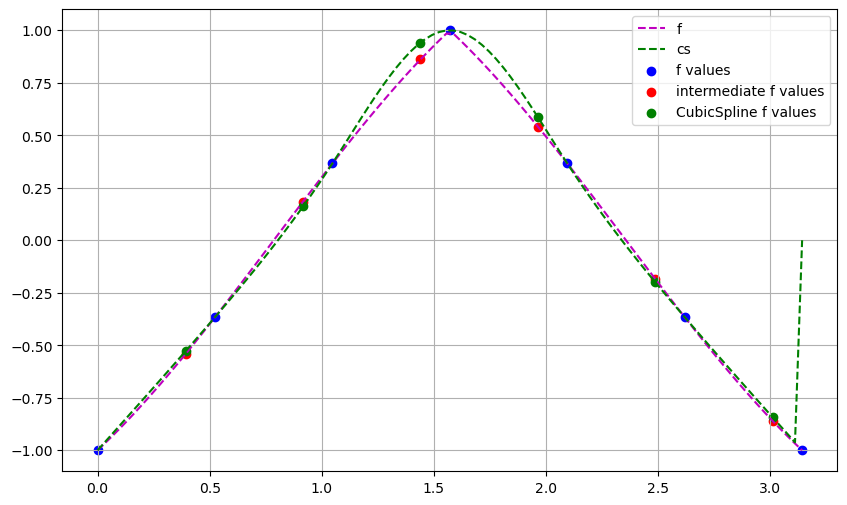

In [249]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, cubic_spline(x, y, x_)[0], '--', color='g', label='cs')
plt.scatter(x, y, color='b', label='f values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_cs, color='g', label='CubicSpline f values')
plt.grid()
plt.legend();

In [250]:
y_interm_cs_cheb, *coef = cubic_spline(x_cheb, y_cheb, x_interm)
print(f'y value in point {idx}: {y_interm_cs_cheb[idx]}')

y value in point 1: 0.2307974435897034


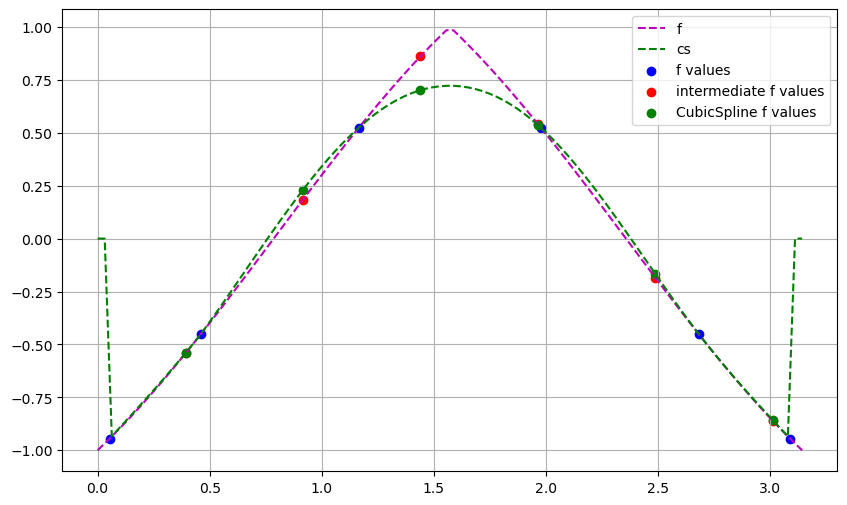

In [251]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, cubic_spline(x_cheb, y_cheb, x_)[0], '--', color='g', label='cs')
plt.scatter(x_cheb, y_cheb, color='b', label='f values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_cs_cheb, color='g', label='CubicSpline f values')
plt.grid()
plt.legend();